In [ ]:
from PIL import Image, ImageFile
from matplotlib.pyplot import imshow
import requests
from io import BytesIO
import numpy as np
import logging

# Python Packages Development

# Introduction

**Reason for Building a Python Package**

* Easier code to reuse

* prevent copying and pasting

* make function up to date

* share codes with others

**Difference between Scripts, Modules and Packages**

* **Script:** A python code run by `python script.py`.

* **Package:** A directory that has all Python codes in it(`numpy`).

* **Subpackage:** A smaller package that is inside a package  (`numpy.random`).

* **Module:** A Python code located inside a package that stores package code.

* **Library:** It can be either a package, or a collection of packages.

## Directory tree of a package

`package1/
  |-- module1.py
  |-- __init__.py`
  
  
* This directory `package1` is a Python Package

* All the package code are within`module1.py` 

* This directory is made to a Python package by __init__.py  

**Subpackages**

**Directory tree of a package**

`me_sklearn/
|-- __init__.py
|-- regression 
| |-- __init__.py
| |-- regression.py
|-- preprocessing
| |-- __init__.py
| |-- normalize.py
| |-- standardize.py
|-- utils.py`

`preprocessing` and `regression` are subpackages. `regression.py`, `standardize.py`are Python modules

## Documentation

We should document each:
* Function

* Class

* Class Method
    
writing help gives documentation as blow:    

In [ ]:
import numpy as np
help(np.sqrt)

Function documentation is as below:

`def genearte_number(nrand=100,file='Output.dat'):
""" Find odd and even numbers.
    It generate an output file defining if number is odd or even
"""`

### Documentation style

* Google documentation style

* NumPy style

* reStructured text style

* Epytext style

NumPy documentation style is the most common one used for `numpy`, `pandas`, `sklearn` and `matplotlib`....


In [ ]:
import numpy as np
help(np.median)

### Generate Template 

* Docstrings can be generated by `pyment`

* It should be run from terminal and can be converted to any other documentation styles (Google, Numpydoc...)


The code below should written in terminal at the same directory of code:

`pyment -w -o numpydoc script1.py`

`-w` overwrites the file and `-o numpydoc` make output to the file. The result is below:

def genearte_number(nrand=100,file='Output.dat'):
    """Find odd and even numbers.

    Parameters
    ----------
    nrand :
         (Default value = 100)
    file :
         (Default value = 'Output.dat')

    Returns
    -------

    """

## Import Structure

See directory tree for package and subpackages of directory below:

`myclustering/
|-- __init__.py
|-- running
| |-- __init__.py
| |-- kmeans.py
| |-- processing.py
|-- monitoring 
| |-- __init__.py
| |-- majorityvote.py
| |-- performance.py`

In [ ]:
import sys
sys.path.append("D:\Resources\Courses\Developing Python Packages\Tests") 

import myclustering

In [ ]:
help(myclustering.running)

In [ ]:
import myclustering.running

In [ ]:
help(myclustering.running)

In [ ]:
import myclustering.running.kmeans

In [ ]:
help(myclustering.running.kmeans)

**Importing subpackages into packages**

* **Absolute import**

This is mostly used. It is more explicit.

In [ ]:
from myclustering import running

* **relative import**

It is used sometimes. Since it is shorter, sometimes it may be
simpler.

A single dot means that the module or package referenced is in the same directory as the current location. Two dots mean that it is in the parent directory of the current location.

In [ ]:
sys.path.append("D:\Resources\Courses\Developing Python Packages\Tests") 
from .myclustering import running

In [ ]:
import myclustering
import myclustering.monitoring
help(myclustering.monitoring)

We imported `monitoring` into `myclustering`but `monitoring` has no link to `majorityvote`. See below:

In [ ]:
help(myclustering.monitoring.majorityvote)

In [ ]:
from myclustering.monitoring import majorityvote
help(myclustering.monitoring.majorityvote)

* Import function into subpackage

In [ ]:
from myclustering.monitoring.majorityvote import Flow_old_new_cluster

In [ ]:
help(Flow_old_new_cluster)

# Install your Package

Packages imported above should be at parent directory, otherwise, they cannot be installed. We can make a package installed to have access to it from anywhere. `setup.py` should be added to package. It is used to install the package. Moreover, it contains metadata on package. To add `setup.py` script, we should slightly restructure our directory. `setup.py` script is part of package but not source code.

We need to create a new folder in setup directory to keep the source code. 

`myclustering/       <-- outer directory
|-- myclustering/    <-- inner source code directory
|   |-- __init__.py
|   |-- running
|   |   |-- __init__.py
|   |   |-- kmeans.py
|   |   |-- processing.py
|   |-- monitoring 
|   |   |-- __init__.py
|   |   |-- majorityvote.py
|   |   |-- performance.py
|-- setup.py    <-- set up script in outer directory`

## What is in setup.py

In [ ]:
# Import functions
from setuptools import setup, find_packages # this is required to find your packages and sub-packages
# setup function is called 

`setup(
    author="Mehdi",
    description="Clustering and monitoring.",
    name="myclustering",
    version="0.1.0",
    packages=find_packages(include=["myclustering","myclustering.*"]), 
)`

version number has three part:
* (major number) . (minor number) . (patch number)

Finally the package can be installed like this `pip install -e .`

* `.` = means install package in current directory
* `-e`= Install package in editable note (make changes to source code, debug...)


We can easily uninstall a Python package by `pip uninstall <packagename>`

In [ ]:
import myclustering
import myclustering.monitoring
from myclustering import running

## Dependency

How to make your package usable for other people.

* Other packages are imported inside your package. For example inside `kmeans.py`, these packages are dependencies:

`import pandas as pd`

`import numpy as np`

....

If someone wants to install your package, you need to make sure those packages are installed.In order to make sure yours have installed you package, you can have install requirement as below:

`setup(
    ...
   install_requires=[
   'matplotlib','pandas', 'scipy'
   ],
)`

<span class="burk">When people install your package by pip, then pip automatically install required packages</span>

Sometimes your code might depend on a specific version of package.



`setup(
    ...
   install_requires=[
   'matplotlib>=2.3.1,<3', 'pandas>=2', 'scipy==2.1'
   ],
)`

we can also include Python version:

`from setuptools import setup, find_packages
setup(
...
python_requires='>=2.7, !=3.0.*, !=3.1.*',
)`

For above example, python version should be bigger than 2.7 but cannot be 3.0 and 3.1.

In [ ]:
"""# Import functions
from setuptools import setup, find_packages # this is required to find your packages and sub-packages

# setup function is called 
setup(
    author="Mehdi",
    description="Clustering and monitoring.",
    name="myclustering",
    version="0.1.0",
    packages=find_packages(include=["myclustering","myclustering.*"]),
    install_requires=['matplotlib','pandas', 
    'scipy', 'scikit-learn==0.24.2'],
    python_requires='>=3.9',

)
"""

## Making an environment for developers

Reproducibility is the key for all software development. Whoever use your software should have all dependencies. Here you want to know exactly each version you want to use.

You can should all package version installed by `pip freeze` command:

`absl-py==1.0.0`

`anaconda-navigator==2.1.4`

`astor==0.8.1`

`astunparse==1.6.3`

`atomicwrites==1.4.0`

`autograd-gamma==0.5.0`

You should export this information to a txt file which you include with your package `pip freeze > requirements.txt` as below:


`myclustering/       <-- outer directory
|-- myclustering/    <-- inner source code directory
|   |-- __init__.py
|   |-- running
|   |   |-- __init__.py
|   |   |-- kmeans.py
|   |   |-- processing.py
|   |-- monitoring 
|   |   |-- __init__.py
|   |   |-- majorityvote.py
|   |   |-- performance.py
|-- setup.py    <-- set up script in outer directory
|-- requirements.txt <-- developer environment`


This allows anyone to install all packages using this pip install command `pip install -r requirements.txt`. Having the exact same set of packages makes it easier to hunt down any bugs.

In [1]:
import myclustering
from myclustering.running import processing as eda

In [2]:
help(eda.EDA_plot.histplt)

Help on function histplt in module myclustering.running.processing:

histplt(val: list, bins: int, title: str, xlabl: str, ylabl: str, xlimt: list, ylimt: list = False, loc: int = 1, legend: int = 1, axt=None, days: int = False, class_: int = False, scale: int = 1, int_: int = 0, nsplit: int = 1, font: int = 5, color: str = 'b') -> None
    Make histogram of data



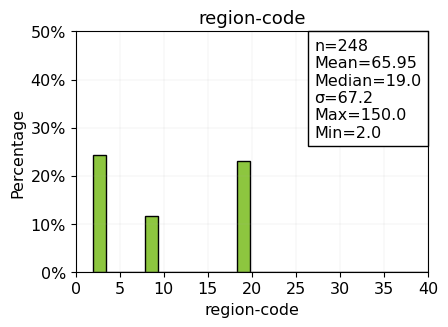

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

font = {'size'   : 7}
plt.rc('font', **font)
fig, ax1 = plt.subplots(figsize=(10, 7), dpi= 100, facecolor='w', edgecolor='k')


url = 'https://raw.githubusercontent.com/lukes/ISO-3166-Countries-with-Regional-Codes/master/all/all.csv'
df = pd.read_csv(url, index_col=0)

ax1=plt.subplot(2,2,1 ) 
val=df['region-code']
eda.EDA_plot.histplt(val,bins=100,title='region-code',xlabl='region-code',
         ylabl='Percentage',xlimt=(0,40),ylimt=(0,0.5),axt=ax1,
         scale=1.15,loc=1,font=10,color='#8DC63F')
plt.show()

## Add Licences and READMEs

**License**

We need a license to give others permission to use our code. We can have a [open source liceses](https://choosealicense.com/) to allow users:

* Apply and use our package


* Modify/change our package


* distribute updated versions of our packages

**README.md**

README is the **"front page"** of the package which we can use it to display in Github or PyPI. Sections in README are :

* Title of package


* Description and applicability


* How to install


* Examples shows how to use


* Contribution


* License


The common README is Markdown (commonmark). It contains `README.md` file, much simpler than reStructuredText



**MANIFEST.in**

All extra files to include in package distribution is listed by `MANIFEST.in`. It includes:

`include LICENSE
 include README.md`


The updated directory tree for package and subpackages are:

`myclustering/       <-- outer directory
|-- myclustering/    <-- inner source code directory
|   |-- __init__.py
|   |-- running
|   |   |-- __init__.py
|   |   |-- kmeans.py
|   |   |-- processing.py
|   |-- monitoring 
|   |   |-- __init__.py
|   |   |-- majorityvote.py
|   |   |-- performance.py
|-- setup.py    
|-- requirements.txt
|-- LICENSE     <--- 
|-- README.md   <--- 
|-- MANIFEST.in <---`

# Publish Packages Online by PyPI

When you install packages by pip, you normally download them from [Python Package Index](https://pypi.org/) whose abbreviation is `pip`. That is an online code repository and anyone from anywhere can upload packages to it.

Only free registration is required. It can be tempted to wait until package is complete and polished before releasing it early. However, releasing early can lead to get feedback to improve your package.

When you upload your package to PyPI, you actually upload a package distributions.

## Distribution Package
**Distribution package** - it is a bundled version of the code which is ready to install. There are two types of Python distribution in Python:
 
  * **Source distribution:** basically the Python source code file you have written. File must be downloaded and the `set up.py` script should be run.

  * **Wheel distribution** is a version of package which is slightly processed format to make it faster to install. It can be installed without running the `setup.py` script. It has smaller size so faster to download. Wheel is preferred Python distribution. When a distribution is uploaded in PyPI, we should always download the wheel and source distribution. 
  
We can build both source and wheel distribution from terminal by the command below: 
  
  `python setup.py sdist bdist_wheel`  
  
   where `sdist` is source distribution and `bdist_wheel` is wheel distribution.  
   
   Running this command make **dist** directory that has wheel and source distribution inside in it. Moreover, it creates **build** and **eg-info** directory (we may not need those files). 
   
`myclustering/     
|-- myclustering/   
|-- setup.py    
|-- requirements.txt
|-- LICENSE    
|-- README.md  
|-- MANIFEST.in
|-- dist       <---
| |-- myclustering-0.1.0-py3-none-any.whl
| |-- myclustering-0.1.0.tar.gz
|-- build
|-- myclustering.egg-info`
  

## Upload Package 

   
Last step is to upload the created distributed files to [PyPI](https://pypi.org/) to get access to package from anywhere. It can be done through terminal with `twine`:

`twine upload dist/*`

We have to go to PyPI](https://pypi.org/) to register before uploading the package. The leads to live package that anyone can have access to it and install it by:

`pip install myclustering`


 Alternatively, we can upload distributions on [TestPyPI](https://test.pypi.org/) instead of [PyPI](https://pypi.org/). It can be done through terminal with `twine`:

`twine upload -r testpypi dist/*`

We need to go to [TestPyPI](https://test.pypi.org/) to register. Package can be installed by:

`pip install --index-url https://test.pypi.org/simple
--extra-index-url https://pypi.org/simple
myclustering`